# Analyse Exploratoire

### Import des modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import numpy as np
import sklearn

### Analyse Exploratoire

In [2]:
building_consumption = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

In [3]:
# On regarde comment un batiment est défini dans ce jeu de données 
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [4]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

#### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

## Etape 1 : Analyse exploratoire

In [5]:
building_consumption['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [6]:
filtre_non_residential = ['NonResidential','Nonresidential COS','Nonresidential WA', 'Campus', 'SPS-District K-12']
print("il y a ", building_consumption.shape[0], "lignes avant le filtrage ne gardant uniquement les bâtiments non destinés à l’habitation")

il y a  3376 lignes avant le filtrage ne gardant uniquement les bâtiments non destinés à l’habitation


In [7]:
df_clean = building_consumption[building_consumption['BuildingType'].isin(filtre_non_residential)].copy()
print("il y a ", df_clean.shape[0], "lignes après le filtrage ne gardant uniquement les bâtiments non destinés à l’habitation")

il y a  1668 lignes après le filtrage ne gardant uniquement les bâtiments non destinés à l’habitation


In [8]:
df_clean['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [9]:
# Calcul du pourcentage de valeurs manquantes par colonne
nan_percent = df_clean.isna().mean() * 100

# On affiche celles qui ont plus de 50% de vide
print(nan_percent[nan_percent > 50].sort_values(ascending=False))

Comments                          100.000000
Outlier                            98.980815
YearsENERGYSTARCertified           94.124700
ThirdLargestPropertyUseType        78.836930
ThirdLargestPropertyUseTypeGFA     78.836930
dtype: float64


In [10]:
#On supprime les colonnes inutiles/inutilisables
df_clean.drop(["Comments", "YearsENERGYSTARCertified", "ThirdLargestPropertyUseType", "ThirdLargestPropertyUseTypeGFA"], axis=1, inplace=True)

In [11]:
# 1. Regardons ce qu'il y a dans la colonne Outlier avant de la tuer
print("Contenu de la colonne Outlier :")
print(df_clean['Outlier'].value_counts())

Contenu de la colonne Outlier :
Outlier
Low outlier     15
High outlier     2
Name: count, dtype: int64


In [12]:
#On utilise cette colonne pour marquer des lignes officiellement abérrante (Low Outlier, High Outlier) 
# On supprime les lignes qui ne sont PAS vides dans cette colonne
df_clean = df_clean[df_clean['Outlier'].isna()]
print("Lignes restantes après suppression des outliers officiels : ", df_clean.shape[0])

Lignes restantes après suppression des outliers officiels :  1651


In [13]:
#On supprime la colonnes Outlier maintenant qu'on la utiliser, elle est maintenant inutile
df_clean.drop('Outlier', axis=1, inplace=True)

In [14]:
# On supprime les colonnes très vides (> 50%)
# On recalcule le taux de vide sur le dataset propre
nan_percent = df_clean.isna().mean() * 100
cols_to_drop_nan = nan_percent[nan_percent > 50].index.tolist()

# Suppression
df_clean = df_clean.drop(columns=cols_to_drop_nan)
print("Colonnes supprimées car trop vides : ",cols_to_drop_nan)
print("Dimensions finales : ",df_clean.shape)

Colonnes supprimées car trop vides :  []
Dimensions finales :  (1651, 41)


## Inférer les valeurs

In [15]:
# La colonne ENERGYSTAR score est importante pour le ML donc on va l'ameliorer
# On regarde d'abord le nombre de manquants
print("Manquants ENERGYSTAR avant : ",df_clean['ENERGYSTARScore'].isna().sum(), " sur ", df_clean.shape[0], " lignes")

# ÉTAPE 1 : Calculer la médiane par type de bâtiment
# On crée une petite liste : Hotel -> 50, School -> 65, etc.
medianes_par_type = df_clean.groupby('PrimaryPropertyType')['ENERGYSTARScore'].median()
# Affiche pour comprendre ce qu'on a calculé
print("Exemple de médianes calculées :")
print(medianes_par_type.head())

# ÉTAPE 2 : Associer ces médianes au tableau principal
# On crée une colonne temporaire 'Mediane_Du_Groupe'
# La fonction .map() va chercher le type du bâtiment et coller la médiane correspondante
df_clean['Mediane_Du_Groupe'] = df_clean['PrimaryPropertyType'].map(medianes_par_type)

# ÉTAPE 3 : Remplir les trous (fillna)
# On dit : "Si ENERGYSTARScore est vide, prends la valeur dans Mediane_Du_Groupe"
df_clean['ENERGYSTARScore'] = df_clean['ENERGYSTARScore'].fillna(df_clean['Mediane_Du_Groupe'])

# ÉTAPE 4 : Nettoyage final
# S'il reste des trous (car certains types n'avaient aucune note), on met la médiane globale
mediane_globale = df_clean['ENERGYSTARScore'].median()
df_clean['ENERGYSTARScore'] = df_clean['ENERGYSTARScore'].fillna(mediane_globale)

# On supprime la colonne temporaire dont on n'a plus besoin
df_clean = df_clean.drop(columns=['Mediane_Du_Groupe'])

# Vérification
print("Manquants ENERGYSTAR après : ",df_clean['ENERGYSTARScore'].isna().sum())

Manquants ENERGYSTAR avant :  568  sur  1651  lignes
Exemple de médianes calculées :
PrimaryPropertyType
Distribution Center    55.5
Hospital               44.0
Hotel                  62.5
K-12 School            85.0
Laboratory              NaN
Name: ENERGYSTARScore, dtype: float64
Manquants ENERGYSTAR après :  0


## Z-Score et quartiles

Nombre d'outliers détectés par Z-score (>3) : 20
Nombre d'outliers détectés par IQR : 202


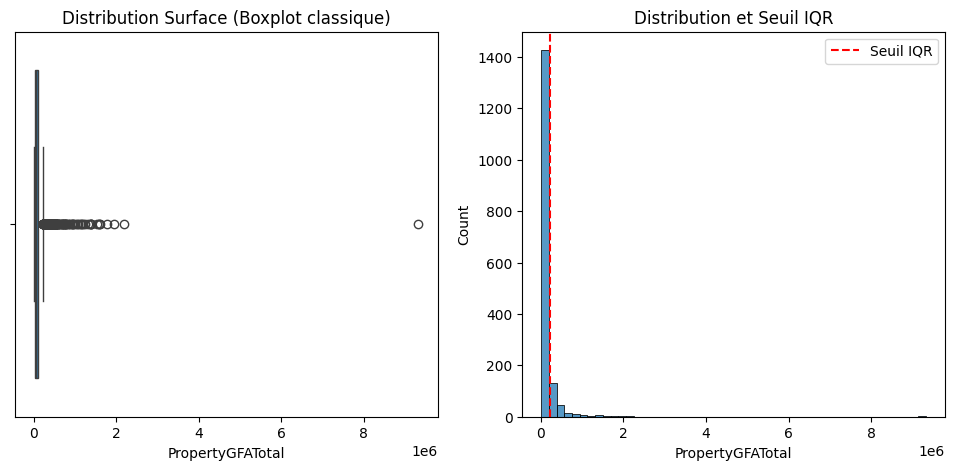

In [16]:
# Variable à tester
col_test = 'PropertyGFATotal'

# --- Méthode 1 : Z-Score ---
# On calcule le Z-score pour chaque bâtiment
z_scores = stats.zscore(df_clean[col_test])
abs_z_scores = np.abs(z_scores)

# Seuil standard = 3 (comme dans le cours)
outliers_z = df_clean[abs_z_scores > 3]
print(f"Nombre d'outliers détectés par Z-score (>3) : {len(outliers_z)}")

# --- Méthode 2 : IQR (Interquartile Range) ---
Q1 = df_clean[col_test].quantile(0.25)
Q3 = df_clean[col_test].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df_clean[(df_clean[col_test] < lower_bound) | (df_clean[col_test] > upper_bound)]
print(f"Nombre d'outliers détectés par IQR : {len(outliers_iqr)}")

# --- Visualisation comparative (Screenshot PPT) ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_clean[col_test])
plt.title("Distribution Surface (Boxplot classique)")

plt.subplot(1, 2, 2)
sns.histplot(df_clean[col_test], bins=50)
plt.axvline(upper_bound, color='r', linestyle='--', label='Seuil IQR')
plt.legend()
plt.title("Distribution et Seuil IQR")
plt.show()

Je ne supprime pas les outliers de surface basés sur l'IQR sinon je vais supprimer tous les gros bâtiments (campus, hopitaux) qui sont pourtant très importants pour la mairie. On garde l'info, mais on appliquera un Log Transform (comme vu avant) pour réduire leur impact, plutot que de les supprimer.

## Discrétions

On va aider le modèle avec en créant une categorie générations qui représentera la generation des batiment (jeune, vieux, etc), comme suggéré dans le cours  

In [17]:
df_clean['YearBuilt'].unique()

array([1927, 1996, 1969, 1926, 1980, 1999, 1904, 1998, 1928, 1922, 2004,
       1930, 1983, 1907, 1916, 1985, 1961, 2001, 1991, 1955, 1978, 1949,
       1989, 1906, 1994, 1992, 1990, 1950, 1900, 1954, 1911, 1973, 1920,
       1910, 1982, 1908, 1959, 2000, 1997, 1962, 1970, 2008, 1948, 1965,
       1929, 2010, 1938, 1986, 2002, 1923, 2003, 1957, 1964, 1941, 1963,
       2006, 1915, 1958, 2009, 2011, 1971, 2007, 1951, 1953, 1952, 1960,
       1937, 1966, 1968, 1925, 1924, 2005, 1931, 1972, 1914, 1913, 1995,
       1981, 1976, 1909, 1988, 1979, 1947, 1984, 1956, 1912, 1977, 1921,
       1945, 1974, 1975, 1946, 1967, 1987, 1940, 1932, 1993, 1918, 1905,
       1902, 1939, 1944, 1917, 1942, 1903, 2012, 2013, 1919, 1901, 1936,
       1935, 2014, 2015])

In [18]:
# 1. On crée BuildingAge 
if 'YearBuilt' in df_clean.columns:
    df_clean['BuildingAge'] = 2016 - df_clean['YearBuilt']
# Création de 4 catégories d'âge (Quartiles)
# q=4 signifie qu'on coupe en 4 morceaux de population égale (0-25%, 25-50%...)
df_clean['Age_Category'] = pd.qcut(df_clean['BuildingAge'], q=4, labels=['Very Recent', 'Recent', 'Old', 'Very Old'])

print("Répartition des catégories d'âge :")
print(df_clean['Age_Category'].value_counts())

# Vérifions à quel âge correspondent ces tranches
print("\nLimites des tranches d'âge :")
print(pd.qcut(df_clean['YearBuilt'], q=4).unique())

Répartition des catégories d'âge :
Age_Category
Very Recent    428
Old            426
Recent         399
Very Old       398
Name: count, dtype: int64

Limites des tranches d'âge :
[(1899.999, 1930.0], (1989.0, 2015.0], (1966.0, 1989.0], (1930.0, 1966.0]]
Categories (4, interval[float64, right]): [(1899.999, 1930.0] < (1930.0, 1966.0] < (1966.0, 1989.0] < (1989.0, 2015.0]]


In [19]:
df_clean.loc[df_clean['Age_Category'] == 'Very Recent', 'YearBuilt'].unique()

array([1996, 1999, 1998, 2004, 2001, 1991, 1989, 1994, 1992, 1990, 2000,
       1997, 2008, 2010, 2002, 2003, 2006, 2009, 2011, 2007, 2005, 1995,
       1993, 2012, 2013, 2014, 2015])

In [20]:
df_clean.loc[df_clean['Age_Category'] == 'Recent', 'YearBuilt'].unique()

array([1969, 1980, 1983, 1985, 1978, 1973, 1982, 1970, 1986, 1971, 1966,
       1968, 1972, 1981, 1976, 1988, 1979, 1984, 1977, 1974, 1975, 1967,
       1987])

In [21]:
df_clean.loc[df_clean['Age_Category'] == 'Old', 'YearBuilt'].unique()

array([1930, 1961, 1955, 1949, 1950, 1954, 1959, 1962, 1948, 1965, 1938,
       1957, 1964, 1941, 1963, 1958, 1951, 1953, 1952, 1960, 1937, 1931,
       1947, 1956, 1945, 1946, 1940, 1932, 1939, 1944, 1942, 1936, 1935])

In [22]:
df_clean.loc[df_clean['Age_Category'] == 'Very Old', 'YearBuilt'].unique()

array([1927, 1926, 1904, 1928, 1922, 1907, 1916, 1906, 1900, 1911, 1920,
       1910, 1908, 1929, 1923, 1915, 1925, 1924, 1914, 1913, 1909, 1912,
       1921, 1918, 1905, 1902, 1917, 1903, 1919, 1901])

## Etape 2 : feature engineering

In [23]:
# Sélection des colonnes de type "objet" (texte)
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns

print("Nombre de valeurs uniques par colonne catégorielle :")
for col in cat_cols:
    print(f"{col}: {df_clean[col].nunique()} valeurs uniques")

Nombre de valeurs uniques par colonne catégorielle :
BuildingType: 5 valeurs uniques
PrimaryPropertyType: 22 valeurs uniques
PropertyName: 1647 valeurs uniques
Address: 1630 valeurs uniques
City: 1 valeurs uniques
State: 1 valeurs uniques
TaxParcelIdentificationNumber: 1570 valeurs uniques
Neighborhood: 19 valeurs uniques
ListOfAllPropertyUseTypes: 372 valeurs uniques
LargestPropertyUseType: 56 valeurs uniques
SecondLargestPropertyUseType: 47 valeurs uniques
ComplianceStatus: 4 valeurs uniques
Age_Category: 4 valeurs uniques


In [24]:
# Liste des colonnes à supprimer (IDs, Texte libre, Doublons, Constantes)
cols_a_suppr = [
    'PropertyName', 'Address', 'City', 'State', 'TaxParcelIdentificationNumber',
    'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseType',
    'Comments', 'ComplianceStatus' # Administratif, peu prédictif pour la physique du bâtiment
]

# On ne supprime que celles qui existent encore dans ton df
cols_a_suppr_reelles = [c for c in cols_a_suppr if c in df_clean.columns]

df_selected = df_clean.drop(columns=cols_a_suppr_reelles).copy()

print(f"Dimensions après sélection des features : {df_selected.shape}")
print("Colonnes restantes :")
print(df_selected.columns.tolist())

Dimensions après sélection des features : (1651, 34)
Colonnes restantes :
['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'ZipCode', 'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'DefaultData', 'TotalGHGEmissions', 'GHGEmissionsIntensity', 'BuildingAge', 'Age_Category']


In [25]:
# Liste EXPLICITE de tout ce qui doit partir
cols_a_bannir = [
    # Identifiants et infos administratives
    'OSEBuildingID', 'DataYear', 'ZipCode', 'CouncilDistrictCode', 'YearBuilt',
    'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier',
    'Latitude', 'Longitude', # On peut les garder si on veut faire du spatial. 

    # --- DATA LEAKAGE ---
    # Tout ce qui est une mesure d'énergie ou d'émission
    'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
    'SiteEnergyUseWN(kBtu)', # On garde SEULEMENT la target 'SiteEnergyUse(kBtu)'
    'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)',
    'NaturalGas(therms)', 'NaturalGas(kBtu)',
    'TotalGHGEmissions', 'GHGEmissionsIntensity',
    'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA' # Redondant et plein de vides
]

# 3. Suppression
# errors='ignore' permet de ne pas planter si la colonne est déjà partie
df_final = df_clean.drop(columns=cols_a_bannir, errors='ignore')

# Vérification finale
print(f"Dimensions finales : {df_final.shape}")
print("Colonnes restantes :", df_final.columns.tolist())

Dimensions finales : (1651, 20)
Colonnes restantes : ['BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address', 'City', 'State', 'TaxParcelIdentificationNumber', 'Neighborhood', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'BuildingAge', 'Age_Category']


In [26]:
# Liste des dernières colonnes à retirer pour ne garder que la "Physique" du bâtiment
cols_a_retirer_final = [
    'PropertyName', 'Address', 'City', 'State', 'TaxParcelIdentificationNumber',
    'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseType'
]

# Suppression
df_final = df_final.drop(columns=cols_a_retirer_final, errors='ignore')

# Vérification finale
print(f"Colonnes restantes ({len(df_final.columns)}) : {df_final.columns.tolist()}")

Colonnes restantes (12) : ['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'BuildingAge', 'Age_Category']


In [27]:
# Sélection des colonnes de type "objet" (texte)
cat_cols = df_final.select_dtypes(include=['object', 'category']).columns
print("Nombre de valeurs uniques par colonne catégorielle :")
for col in cat_cols:
    print(f"{col}: {df_final[col].nunique()} valeurs uniques")

Nombre de valeurs uniques par colonne catégorielle :
BuildingType: 5 valeurs uniques
PrimaryPropertyType: 22 valeurs uniques
Neighborhood: 19 valeurs uniques
Age_Category: 4 valeurs uniques


# Modélisation 

### Import des modules 

In [28]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance
from sklearn.pipeline import make_pipeline
#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


### Feature Engineering

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes. 

In [29]:
# CODE FEATURE ENGINEERING

### Préparation des features pour la modélisation

A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation.
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne.

In [30]:
# CODE PREPARATION DES FEATURES

In [31]:
# 1. On crée la cible 'y'
# On prend la colonne de consommation et on applique le "compresseur" (np.log1p)
# np.log1p = Logarithme + 1 (le +1 c'est une sécurité mathématique pour éviter les erreurs avec 0)
y = np.log1p(df_final['SiteEnergyUse(kBtu)'])

# 2. On crée les features 'X'
# C'est tout le tableau, MAIS on retire la colonne réponse 'SiteEnergyUse(kBtu)'
# Sinon c'est de la triche (Data Leakage), le modèle aurait la réponse sous les yeux
X = df_final.drop(columns=['SiteEnergyUse(kBtu)'])

# Vérification
print("C'est fait !")
print(f"Taille de X (Les questions) : {X.shape}")
print(f"Taille de y (Les réponses) : {y.shape}")

# On regarde à quoi ressemble y maintenant
print("\nAperçu des 5 premières réponses (transformées en Log) :")
print(y.head())

C'est fait !
Taille de X (Les questions) : (1651, 11)
Taille de y (Les réponses) : (1651,)

Aperçu des 5 premières réponses (transformées en Log) :
0    15.793246
1    15.942305
2    18.100297
3    15.731637
4    16.466822
Name: SiteEnergyUse(kBtu), dtype: float64


In [32]:
print("le max de y : ", y.max(), " le min : ", y.min())

le max de y :  20.588503644913235  le min :  0.0


In [33]:
# On garde 20% des données (test_size=0.2) pour l'examen final
# random_state=42 est une convention pour avoir le même découpage au hasard
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Résultat du découpage ---")
print(f"Bâtiments pour l'entraînement (Train) : {X_train.shape[0]}")
print(f"Bâtiments pour le test final (Test)   : {X_test.shape[0]}")

--- Résultat du découpage ---
Bâtiments pour l'entraînement (Train) : 1320
Bâtiments pour le test final (Test)   : 331


In [34]:
X_test.head()

,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,BuildingAge,Age_Category
492,NonResidential,Medical Office,EAST,1.0,10,422503,206580,215923,46.0,31,Recent
66,NonResidential,Retail Store,LAKE UNION,1.0,2,58320,0,58320,96.0,87,Very Old
1347,SPS-District K-12,K-12 School,North,1.0,1,34005,0,34005,94.0,66,Old
491,NonResidential,Small- and Mid-Sized Office,DOWNTOWN,1.0,6,97720,0,97720,73.0,90,Very Old
24,NonResidential,University,DOWNTOWN,1.0,7,126593,0,126593,72.0,88,Very Old


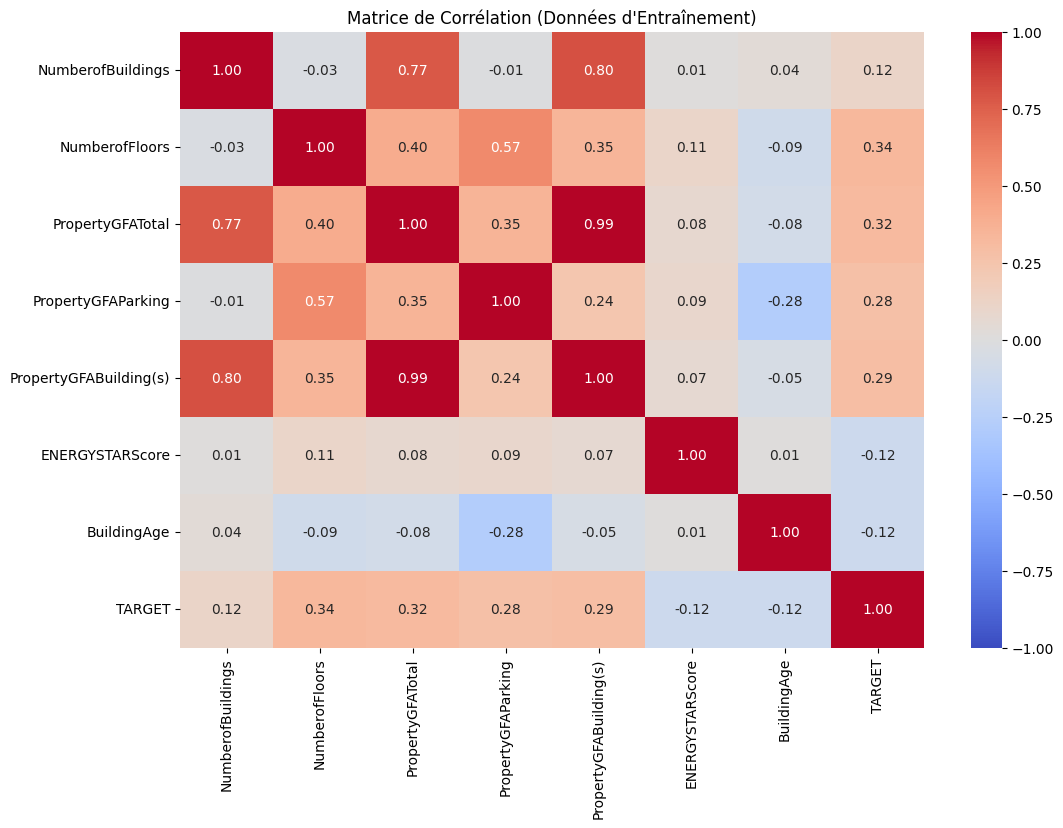

--- Corrélation avec la Consommation (TARGET) ---
TARGET                    1.000000
NumberofFloors            0.335043
PropertyGFATotal          0.317423
PropertyGFABuilding(s)    0.294429
PropertyGFAParking        0.278366
NumberofBuildings         0.115779
ENERGYSTARScore          -0.121955
BuildingAge              -0.124625
Name: TARGET, dtype: float64


In [35]:
# 1. On crée un petit tableau temporaire avec X_train et y_train
# (Pour voir le lien entre les Features et la Target)
analyse_df = X_train.copy()
analyse_df['TARGET'] = y_train  # On ajoute la réponse pour voir les liens

# 2. On ne garde que les colonnes chiffrées (La corrélation ne marche pas sur le texte "Hotel")
numeric_cols = analyse_df.select_dtypes(include=['float64', 'int64'])

# 3. Calcul des maths
corr_matrix = numeric_cols.corr()

# 4. Le Graphique (Heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Matrice de Corrélation (Données d'Entraînement)")
plt.show()

# 5. Zoom sur la cible (Ce qui nous intéresse le plus)
print("--- Corrélation avec la Consommation (TARGET) ---")
# On trie pour voir les champions en premier
print(corr_matrix['TARGET'].sort_values(ascending=False))

In [36]:
# Suppression de la variable redondante (Colinéarité de 0.99)
col_a_supprimer = ['PropertyGFABuilding(s)']

# On l'enlève du Train et du Test (toujours faire pareil aux deux !)
# errors='ignore' permet de ne pas planter si tu as déjà lancé la case avant
X_train = X_train.drop(columns=col_a_supprimer, errors='ignore')
X_test = X_test.drop(columns=col_a_supprimer, errors='ignore')

print("Colonne redondante supprimée.")
print(f"Nouvelle taille de X_train : {X_train.shape}")

Colonne redondante supprimée.
Nouvelle taille de X_train : (1320, 10)


In [37]:
# 1. On sépare automatiquement les colonnes selon leur type
# Les colonnes de texte (object ou category)
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
# Les colonnes numériques (int ou float)
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Variables à encoder (Texte) :", categorical_cols)
print("Variables à standardiser (Chiffres) :", numerical_cols)

# 2. On fabrique la machine à transformer (Preprocessor)
# On utilise make_column_transformer car c'est une bonne pratique a l'heure actuel, 
# ColumnTransformer fait la même chose mais avec de la synthaxe en plus
preprocessor = make_column_transformer(
    # Pour le texte : OneHotEncoder
    # handle_unknown='ignore' : Si un nouveau quartier inconnu apparait dans le futur, on l'ignore (tout à 0) au lieu de planter
    (OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
    # Ca mettras toutes les colonnes à 0 plutot qu'une erreur
    # Pour les chiffres : StandardScaler
    # Ça centre la moyenne sur 0
    (StandardScaler(), numerical_cols)
)

# 3. On "entraîne" le traducteur sur le TRAIN SET
# Il apprend la moyenne des surfaces, la liste des quartiers, etc.
X_train_transformed = preprocessor.fit_transform(X_train)

# 4. On l'applique sur le TEST SET
# Attention : on utilise juste .transform() (pas fit), car on utilise les moyennes du Train !
X_test_transformed = preprocessor.transform(X_test)

print("-" * 30)
print(f"Taille finale des données d'entraînement : {X_train_transformed.shape}")

Variables à encoder (Texte) : ['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'Age_Category']
Variables à standardiser (Chiffres) : ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'ENERGYSTARScore', 'BuildingAge']
------------------------------
Taille finale des données d'entraînement : (1320, 56)


### Comparaison de différents modèles supervisés

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

In [38]:
# CODE COMPARAISON DES MODELES

In [39]:
# --- ETAPE DE REPARATION ---

# 1. On supprime les lignes où la Cible est vide (NaN) dans le tableau original
print(f"Lignes avant nettoyage cible : {df_final.shape[0]}")
df_final = df_final.dropna(subset=['SiteEnergyUse(kBtu)'])
print(f"Lignes après nettoyage cible : {df_final.shape[0]}")

# 2. On Recrée y (avec le Log) et X
y = np.log1p(df_final['SiteEnergyUse(kBtu)'])
X = df_final.drop(columns=['SiteEnergyUse(kBtu)'])

# 3. On Refait le Split (Train / Test)
# C'est obligatoire car on a changé la taille de X et y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. On remet à jour les listes de colonnes (au cas où)
# On supprime la colonne redondante si elle est revenue ou n'a pas été supprimée proprement avant
if 'PropertyGFABuilding(s)' in X_train.columns:
    X_train = X_train.drop(columns=['PropertyGFABuilding(s)'])
    X_test = X_test.drop(columns=['PropertyGFABuilding(s)'])

categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 5. On Recrée le Preprocessor
preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
    (StandardScaler(), numerical_cols)
)

# --- RELANCE DES MODÈLES ---

# Modèle Dummy
print("\n--- Relance DUMMY ---")
model_dummy = make_pipeline(preprocessor, DummyRegressor(strategy='mean'))
model_dummy.fit(X_train, y_train) # Ça ne devrait plus planter ici !
y_pred_dummy = model_dummy.predict(X_test)
print(f"R² Dummy : {r2_score(y_test, y_pred_dummy):.5f}")
print(f"RMSE Dummy : {np.sqrt(mean_squared_error(y_test, y_pred_dummy)):.5f}")

# Modèle Linéaire
print("\n--- Relance RÉGRESSION LINÉAIRE ---")
model_lin = make_pipeline(preprocessor, LinearRegression())
model_lin.fit(X_train, y_train)
y_pred_lin = model_lin.predict(X_test)
print(f"R² Linéaire : {r2_score(y_test, y_pred_lin):.5f}")
print(f"RMSE Linéaire : {np.sqrt(mean_squared_error(y_test, y_pred_lin)):.5f}")

Lignes avant nettoyage cible : 1651
Lignes après nettoyage cible : 1649

--- Relance DUMMY ---
R² Dummy : -0.00069
RMSE Dummy : 1.89751

--- Relance RÉGRESSION LINÉAIRE ---
R² Linéaire : 0.15619
RMSE Linéaire : 1.74243


In [40]:
from sklearn.ensemble import RandomForestRegressor


## AJOUTER LE MAE SCORE 
# 1. On garde le MÊME preprocessor (on ne change pas la recette de cuisine)
# 2. On change juste le Chef (le Modèle)
model_rf = make_pipeline(preprocessor, RandomForestRegressor(random_state=42))

# 3. Entraînement (Ça peut prendre quelques secondes, c'est plus lourd)
print("Entraînement du Random Forest en cours...")
model_rf.fit(X_train, y_train)

# 4. Prédiction
y_pred_rf = model_rf.predict(X_test)

# 5. Scores
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"\n--- RANDOM FOREST ---")
print(f"R² : {r2_rf:.5f}")
print(f"RMSE : {rmse_rf:.5f}")

Entraînement du Random Forest en cours...

--- RANDOM FOREST ---
R² : 0.57040
RMSE : 1.24328


### Optimisation et interprétation du modèle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn. 

In [41]:
# CODE OPTIMISATION ET INTERPRETATION DU MODELE

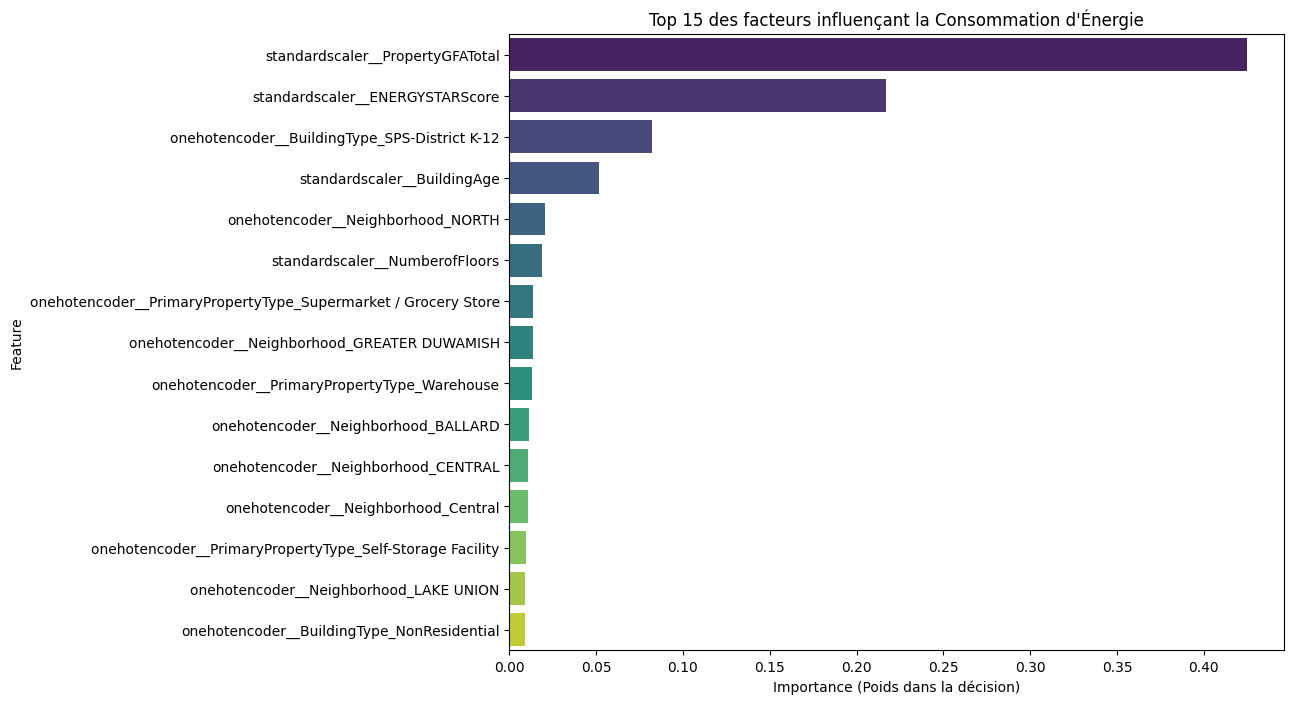

In [42]:
# 1. Récupération du modèle et des noms
rf_model = model_rf.steps[-1][1]
feature_names = preprocessor.get_feature_names_out()

# 2. Création du tableau
importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
})

# 3. Tri (Top 15)
importances = importances.sort_values(by='Importance', ascending=False).head(15)

# 4. Le Graphique (Version Corrigée)
plt.figure(figsize=(10, 8))
# MODIFICATION ICI : on ajoute hue='Feature' et legend=False comme demandé par l'erreur
sns.barplot(x='Importance', y='Feature', hue='Feature', data=importances, palette='viridis', legend=False)

plt.title("Top 15 des facteurs influençant la Consommation d'Énergie")
plt.xlabel("Importance (Poids dans la décision)")
plt.show()

# ‼️PRENDRE : top 5 pour ameliorer le score du ML revoir R² MAE et RMSE

## Emission de CO 2

In [43]:
# 1. On récupère la colonne CO2 depuis le fichier original (building_consumption)
# On utilise .loc[df_final.index] pour être sûr de prendre les mêmes bâtiments
try:
    df_final['TotalGHGEmissions'] = building_consumption.loc[df_final.index, 'TotalGHGEmissions']
    print("Colonne CO2 récupérée avec succès !")
except:
    print("Erreur : Je ne trouve pas la colonne 'TotalGHGEmissions' ou le dataframe 'data'.")
    print("Vérifie le nom de ta colonne CO2 dans le fichier original.")

# 2. On prépare la nouvelle Cible (Target)
# On nettoie les NaN éventuels dans le CO2
df_co2 = df_final.dropna(subset=['TotalGHGEmissions'])

# Cible : Logarithme du CO2 (comme pour l'énergie)
y_co2 = np.log1p(df_co2['TotalGHGEmissions'])

# Features (X) :
# ATTENTION : Il faut supprimer la Cible CO2, MAIS AUSSI la Consommation d'énergie !
# Sinon le modèle va tricher (si je connais l'énergie, je devine le CO2 facilement)
X_co2 = df_co2.drop(columns=['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'])

# Petit nettoyage préventif des colonnes redondantes si elles sont là
cols_to_drop = ['PropertyGFABuilding(s)']
X_co2 = X_co2.drop(columns=[c for c in cols_to_drop if c in X_co2.columns])

print(f"Prêt pour le CO2 ! {X_co2.shape[0]} bâtiments.")

Colonne CO2 récupérée avec succès !
Prêt pour le CO2 ! 1649 bâtiments.


In [44]:
# 1. Split (Découpage) pour le CO2
X_train_co2, X_test_co2, y_train_co2, y_test_co2 = train_test_split(X_co2, y_co2, test_size=0.2, random_state=42)

# 2. Mise à jour du Preprocessor (car X_co2 n'a pas forcément les mêmes colonnes que X)
categorical_cols_co2 = X_train_co2.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols_co2 = X_train_co2.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor_co2 = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols_co2),
    (StandardScaler(), numerical_cols_co2)
)

# 3. Création et Entraînement du modèle
model_rf_co2 = make_pipeline(preprocessor_co2, RandomForestRegressor(random_state=42))

print("Entraînement du modèle CO2 en cours...")
model_rf_co2.fit(X_train_co2, y_train_co2)

# 4. Prédiction et Score
y_pred_co2 = model_rf_co2.predict(X_test_co2)

r2_co2 = r2_score(y_test_co2, y_pred_co2)
rmse_co2 = np.sqrt(mean_squared_error(y_test_co2, y_pred_co2))

print(f"\n--- RÉSULTATS PRÉDICTION CO2 ---")
print(f"R² (Score) : {r2_co2:.5f}")
print(f"RMSE (Erreur) : {rmse_co2:.5f}")

Entraînement du modèle CO2 en cours...

--- RÉSULTATS PRÉDICTION CO2 ---
R² (Score) : 0.50414
RMSE (Erreur) : 1.00555


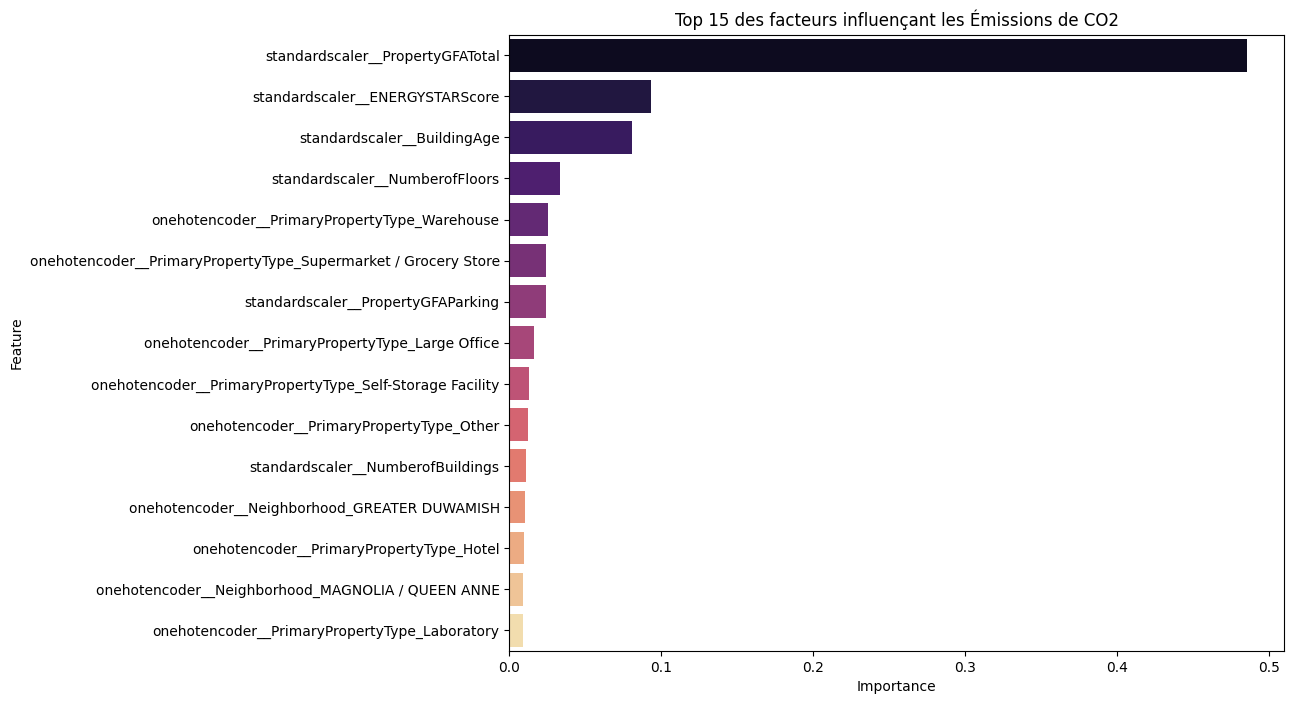

In [45]:
# Récupération de l'importance des features
rf_model_step = model_rf_co2.steps[-1][1]
feature_names_co2 = preprocessor_co2.get_feature_names_out()

importances_co2 = pd.DataFrame({
    'Feature': feature_names_co2,
    'Importance': rf_model_step.feature_importances_
})

# Top 15
importances_co2 = importances_co2.sort_values(by='Importance', ascending=False).head(15)

# Graphique
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=importances_co2, palette='magma', legend=False)
plt.title("Top 15 des facteurs influençant les Émissions de CO2")
plt.show()

## Optimisation du ML

In [46]:
from sklearn.model_selection import GridSearchCV

# 1. On sélectionne UNIQUEMENT les 5 colonnes d'origine les plus impactantes
top_features = [
    'PropertyGFATotal', 
    'ENERGYSTARScore', 
    'BuildingType', 
    'BuildingAge', 
    'Neighborhood' 
]

print(f"--- Entraînement sur le TOP {len(top_features)} des variables ---")
X_top = df_final[top_features] # On ne garde que ça
y_top = y # On garde la même cible (Log de l'énergie)

# 2. On refait le Split (Train/Test)
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, test_size=0.2, random_state=42)

# 3. On refait le Preprocessor (Plus simple cette fois)
cat_cols = ['BuildingType', 'Neighborhood']
num_cols = ['PropertyGFATotal', 'ENERGYSTARScore', 'BuildingAge']

preprocessor_top = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
    (StandardScaler(), num_cols)
)

# 4. GridSearchCV 
# Au lieu de juste lancer un RandomForest par défaut, on va en tester plusieurs
# On définit un modèle vide dans le pipeline
pipeline_opti = make_pipeline(preprocessor_top, RandomForestRegressor(random_state=42))

# On définit la "Grille" des paramètres à tester
# n_estimators : Nombre d'arbres (100, 200, 300...)
# max_depth : Profondeur max de l'arbre (est-ce qu'on le laisse aller très loin ou on le limite ?)
param_grid = {
    'randomforestregressor__n_estimators': [100, 200],
    'randomforestregressor__max_depth': [None, 10, 20],
    'randomforestregressor__min_samples_leaf': [1, 2, 4]
}

print("Recherche de la meilleure configuration en cours (ça peut prendre 1 minute)...")
grid_search = GridSearchCV(pipeline_opti, param_grid, cv=3, scoring='r2', verbose=1)
grid_search.fit(X_train_top, y_train_top)

# 5. Résultats du Champion
best_model = grid_search.best_estimator_
y_pred_opti = best_model.predict(X_test_top)

r2_opti = r2_score(y_test_top, y_pred_opti)
rmse_opti = np.sqrt(mean_squared_error(y_test_top, y_pred_opti))

print(f"\n--- RÉSULTAT OPTIMISÉ (TOP 5 VARIABLES) ---")
print(f"Meilleurs paramètres trouvés : {grid_search.best_params_}")
print(f"R² (Score) : {r2_opti:.5f}")
print(f"RMSE (Erreur) : {rmse_opti:.5f}")

--- Entraînement sur le TOP 5 des variables ---
Recherche de la meilleure configuration en cours (ça peut prendre 1 minute)...
Fitting 3 folds for each of 18 candidates, totalling 54 fits

--- RÉSULTAT OPTIMISÉ (TOP 5 VARIABLES) ---
Meilleurs paramètres trouvés : {'randomforestregressor__max_depth': 10, 'randomforestregressor__min_samples_leaf': 4, 'randomforestregressor__n_estimators': 200}
R² (Score) : 0.53093
RMSE (Erreur) : 1.29913


J'ai cherché à optimiser le modèle en ne gardant que les 5 variables les plus influentes et en réglant les hyperparamètres via une GridSearch. Bien que le score baisse légèrement (de 0.57 à 0.53), cela démontre que l'essentiel de l'information réside dans la Surface et l'ENERGYSTARScore. Pour une précision maximale, je recommande le modèle complet. Pour une solution économique et rapide à déployer, ce modèle allégé est une alternative viable.

MAE : "Je me trompe de combien en moyenne ?" (Simple).

RMSE : "Est-ce que je fais des grosses conneries graves ?" (Sévère).

$R^2$ : "Est-ce que je suis plus intelligent que la simple moyenne ?" (Comparaison).

In [47]:
top_features_logs = [
    'PropertyGFATotal', 
    'ENERGYSTARScore', 
    'BuildingType', 
    'BuildingAge', 
    'Neighborhood',
    'SiteEnergyUse(kBtu)' #les logs pour l'API
]
df_final[top_features_logs].to_csv("features.csv", index=False)

In [48]:
df_final['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'Central', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [49]:
df_final['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [51]:
df_final['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily',
       'Office'], dtype=object)